In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Trying ISO-8859-1 or Windows-1252 encoding as normally importing the file was causing error
data = pd.read_csv(r"C:\Users\Acer\Desktop\UdemyCourses.csv", encoding='ISO-8859-1')

In [3]:
data.shape
# 3682 rows, 11 columns

(3682, 11)

In [4]:
data.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


# 1. What are all the different subjects for which Udemy is providing courses?

In [5]:
data.subject.unique()


array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

# 2. Which subject has maximum number of courses?

In [6]:
data.subject.max()

'Web Development'

In [7]:
data.subject.value_counts()

subject
Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

# 3. Show all the courses which are free of cost.

In [8]:
data[data.is_paid == False]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23T05:08:14Z,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,Musical Instruments
57,955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13T21:51:59Z,Musical Instruments
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10T20:19:10Z,Web Development
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30T14:30:12Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3620,552598,WordPress in under an hour - Create/manage you...,False,Free,6474,86,15,All Levels,1 hour,2015-07-15T00:21:56Z,Web Development
3638,1068590,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2.5 hours,2017-01-18T17:01:40Z,Web Development
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,1.5 hours,2016-03-03T17:45:31Z,Web Development
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z,Musical Instruments


In [9]:
data[data['is_paid'] == False]['subject'].count()

310

In [10]:
# Use pivot_table for a cleaner table format
pivot_counts = data.pivot_table(index='subject', columns='is_paid', aggfunc='size', fill_value=0)
print(pivot_counts)


is_paid              False  True 
subject                          
Business Finance        96   1103
Graphic Design          35    568
Musical Instruments     46    634
Web Development        133   1067


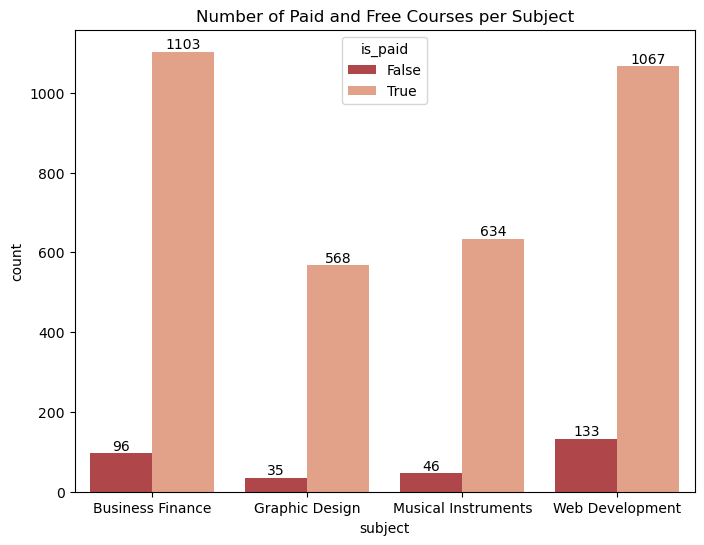

In [11]:
# Reset index and reshape data with melt
# melt: used to reshape the DataFrame from wide format to long format.
pivot_counts_new = pivot_counts.reset_index().melt(id_vars='subject', var_name='is_paid', value_name='count')

sns.set_palette('RdBu')

# Create the bar plot
plt.figure(figsize=(8, 6)) 
ay = sns.barplot(x='subject', y='count', hue='is_paid', data=pivot_counts_new)

for container in ay.containers:
    ay.bar_label(container)

plt.title('Number of Paid and Free Courses per Subject')
plt.show()


By the graph, we can draw the insigts that 'Business Finance' is having the highest number of Paid courses, whereas 'Graphic Design' having the lowest.

Whereas, if we draw conclusions for the free courses, 'WEB DEVELOPMENT' tops the chart.

# 4. Show all the courses which are paid?

In [12]:
data[data.is_paid == True]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26T20:48:48Z,Business Finance
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development


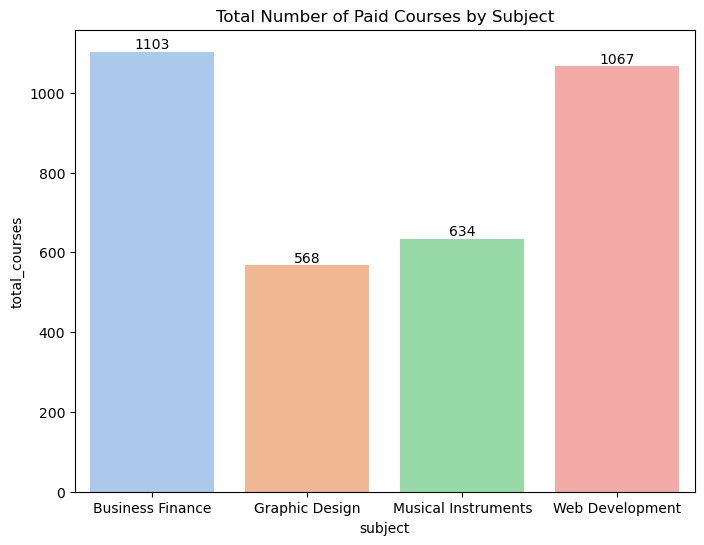

In [13]:
paid_courses = data[data['is_paid'] == True]
# grouping data by using subject and price columns
grouped_data = paid_courses.groupby(['subject', 'price']).size().reset_index(name='course_count')
# to have more statistical analysis
price_summary = paid_courses.groupby('subject').agg(
    max_price=('price', 'max'),
    min_price=('price', 'min'),
    total_courses=('price', 'count')  
).reset_index()
# to plot the graph
sns.set_palette('pastel')
plt.figure(figsize = (8,6))
am = sns.barplot(x = 'subject', y = 'total_courses' , data = price_summary )
for container in am.containers:
    am.bar_label(container)
plt.title('Total Number of Paid Courses by Subject')
plt.show()

# 5. Which are top selling courses?

In [14]:
data.sort_values(by = 'num_subscribers', ascending = False).head(1)
# False: sorts in descending order (from largest to smallest).

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development


'Web Development' is the top selling course, having 268923 number of subscribers.

# 6. Which are least selling courses?

In [45]:
data.sort_values('num_subscribers', ascending = True).head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
649,1233314,Building a Balanced Scorecard,True,50.0,0,0,11,Intermediate Level,2 hours,2017-07-03T21:38:22Z,Business Finance


'Business Finance' is the least selling course

# 7. Show all courses of graphic design where the price is below 100


In [58]:
# Ensure price is numeric
data.loc[:, 'price'] = pd.to_numeric(data['price'], errors='coerce')

# Filter data
filtered_data = data[(data.subject == 'Graphic Design') & (data.price < 100)].head(6)
print(filtered_data)


   course_id                                       course_title is_paid price  \
8     206592  :::Beginners Guide To Creating Amazing Images ...    True  25.0   
20   1165268  15  Motion Graphic Elements in After Effect (S...    True  30.0   
35   1164876  3DS MAX - Learn 3Ds MAX tutorial for Beginners...    True  20.0   
39    599652                     48 Logo Designs and Techniques    True  20.0   
52    794036       8 Stunden professionelles Cinema 4D Training    True  50.0   
58    435626  A Beginners Guide to creating Vector Graphics ...    True  20.0   

   num_subscribers num_reviews num_lectures               level  \
8               72           5           17      Beginner Level   
20               8           0           20  Intermediate Level   
35             785           2           29          All Levels   
39             113           9           48          All Levels   
52              18           1           38          All Levels   
58            1207           5

# 8. Show all the courses of web development where the price is above 50?


In [17]:
data[(data.subject == 'Web Development') & (data.price > '50')]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10T20:19:10Z,Web Development
145,425084,Administering Microsoft SQL Server 2012 Databa...,True,60,586,65,98,All Levels,5.5 hours,2015-03-23T00:20:29Z,Web Development
193,990532,Advance Unix : File Processing: AWK | SED | GR...,True,75,578,40,84,Expert Level,5.5 hours,2017-01-27T05:12:57Z,Web Development
209,212398,Advanced Node.js Development,True,55,2565,32,41,Expert Level,3 hours,2014-08-28T03:35:30Z,Web Development
222,866384,Advanced WordPress Topics: Post Types Taxonomi...,True,95,301,44,91,Intermediate Level,7.5 hours,2016-07-10T16:04:35Z,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
3631,339086,WordPress Security - The Ultimate Security Guide,True,60,2267,17,29,All Levels,1.5 hours,2015-01-04T20:28:06Z,Web Development
3638,1068590,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2.5 hours,2017-01-18T17:01:40Z,Web Development
3651,424864,Write PHP Like a Pro: Build a PHP MVC Framewor...,True,70,1703,435,65,All Levels,3 hours,2016-02-04T22:36:17Z,Web Development
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,1.5 hours,2016-03-03T17:45:31Z,Web Development


# Show the average price range of all the subjects visually.

In [31]:
"""as the data type of price was object before, but since for further questions we need to use aggregation on price column, 
hence we have to change it into float."""

data['price'] = pd.to_numeric(data['price'], errors='coerce')
data = data.dropna(subset=['price']) 
"""handle any NaN values that may have resulted from non-numeric entries, hence, dropping these rows"""

price_summary = data.groupby('subject')['price'].mean().reset_index()
print(price_summary)


               subject      price
0     Business Finance  74.378966
1       Graphic Design  61.390845
2  Musical Instruments  53.154574
3      Web Development  86.635426


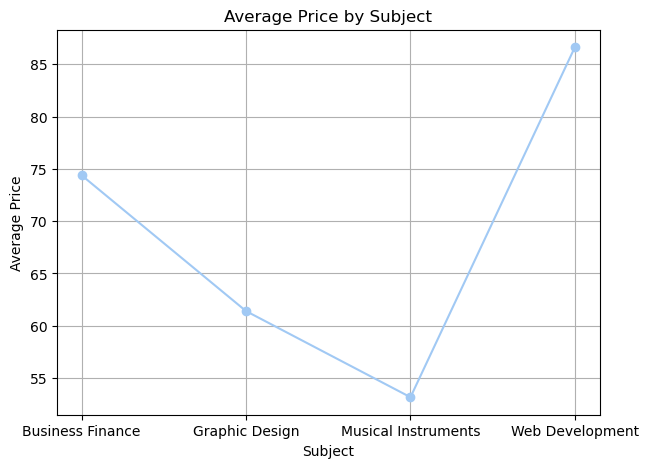

In [40]:
plt.figure(figsize=(7, 5))
plt.plot(price_summary['subject'], price_summary['price'], marker='o')
plt.title('Average Price by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Price')
plt.grid()
plt.show()


# 9. What are courses that published in year 2015?


In [46]:
data.head(2)


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35.0,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75.0,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments


In [47]:
data.dtypes
# we need to convert "published_timestamp" to datetime

course_id                int64
course_title            object
is_paid                   bool
price                  float64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration        object
published_timestamp     object
subject                 object
dtype: object

In [53]:
data.loc[:, 'published_timestamp'] = pd.to_datetime(data['published_timestamp'])
# pd.to_datetime - this function converts value of a column to datetime

In [55]:
data.loc[:, 'Year'] = data['published_timestamp'].dt.year

In [57]:
data[data.Year == 2015].head(5)


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
10,591880,1 - Concepts of Statistics For Beginners Step ...,True,200.0,273,4,15,Beginner Level,31 mins,2015-08-30 22:48:34+00:00,Business Finance,2015.0
16,302450,10 Numbers Every Business Owner Should Know,True,20.0,13,1,9,All Levels,1 hour,2015-03-08 19:11:24+00:00,Business Finance,2015.0
19,384928,101 Blues riffs - learn how the harmonica supe...,True,200.0,1350,65,55,Intermediate Level,6.5 hours,2015-01-04 21:14:31+00:00,Musical Instruments,2015.0
23,550842,16 Guitar Chords to Jam With - (Beginner - Int...,True,20.0,1224,19,20,Beginner Level,1 hour,2015-07-10 19:53:56+00:00,Musical Instruments,2015.0
26,486240,2 Easy Steps To Investment And Avoiding Traps,True,20.0,828,1,20,All Levels,1 hour,2015-04-27 23:18:59+00:00,Business Finance,2015.0


There are 1014 courses which are published in 2015 itself.

# 10. What are the maximum number of subscribers for each level of courses?

In [59]:
data.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', NaT], dtype=object)

In [60]:
data.groupby('level')['num_subscribers'].max()

level
All Levels            121584
Beginner Level         51257
Expert Level            5172
Intermediate Level     25799
Name: num_subscribers, dtype: object

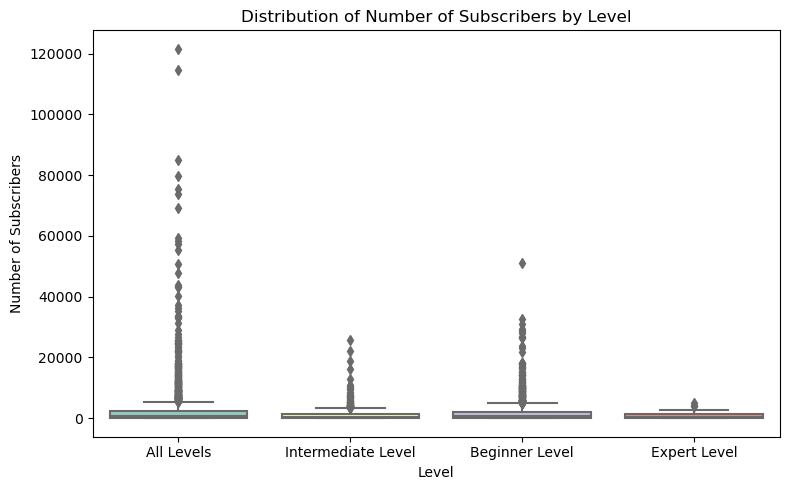

In [66]:
data.loc[:,'num_subscribers'] = pd.to_numeric(data['num_subscribers'], errors='coerce')
# Creating a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='level', y='num_subscribers', data=data, palette='Set3')

plt.title('Distribution of Number of Subscribers by Level')
plt.xlabel('Level')
plt.ylabel('Number of Subscribers')
plt.tight_layout()
plt.show()